# Problem Statement

## About Dataset

### Context

Amazon.com is one of the largest e-commerce and cloud computing companies. Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.

### Content

This is a simplified and small version of the Amazon Fine Foods dataset. It is a dataset related to 3000 customer reviews and ratings of food related products sold on their website up to Oct 2012. The size of the dataset is ideal for beginner experiments with NLP techniques.

The dataset contains the following columns:

* Id -> Review ID

* Product Id -> Unique identifier for the product

* User Id -> Unique identifier for the user

* Profile Name -> Name of the user who wrote the review

* Helpful Numerator -> Number of users who found the review helpful

* Helpful Denominator -> Number of users who found the review helpful or not)

* Score -> Rating given in the review (5 being the highest and 1 being the lowest rating)

* Time -> Date and time of the review

* Summary -> Summary of the review

* Text -> Text of the review


## Read in Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
df=pd.read_csv('C:\\Users\\smrc\\OneDrive\\Desktop\\NLP Modelling\\AmazonFineFoods3k.csv')

In [4]:
df.head(4)

,565455,B002GKEK7G,A2BOPOKO6HKS3E,Stacey Walker,0,0.1,5,1317945600,My daily pick-me-up,I LOVE Click! My favorite protein drink by far. I add a little sugar-free caramel coffee syrup and a few drops coconut extract. Tastes just like a Samoa.
0,565456,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
1,565457,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
2,565458,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
3,565459,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...


In [5]:
df.columns

Index(['565455', 'B002GKEK7G', 'A2BOPOKO6HKS3E', 'Stacey Walker', '0', '0.1',
       '5', '1317945600', 'My daily pick-me-up',
       'I LOVE Click!  My favorite protein drink by far.  I add a little sugar-free caramel coffee syrup and a few drops coconut extract.  Tastes just like a Samoa.'],
      dtype='object')

In [6]:
# Define a dictionary to map old column names to new column names
new_column_names = {
    '565455': 'Id',
    'B002GKEK7G': 'Product Id',
    'A2BOPOKO6HKS3E': 'User Id',
    'Stacey Walker': 'Profile Name',
    '0': 'Helpful Numerator',
    '0.1': 'Helpful Denominator',
    '5': 'Score',
    '1317945600': 'Time',
    'My daily pick-me-up': 'Summary',
    'I LOVE Click!  My favorite protein drink by far.  I add a little sugar-free caramel coffee syrup and a few drops coconut extract.  Tastes just like a Samoa.': 'Text'
}

In [7]:
# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [8]:
df.head(3)

,Id,Product Id,User Id,Profile Name,Helpful Numerator,Helpful Denominator,Score,Time,Summary,Text
0,565456,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
1,565457,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
2,565458,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...


In [9]:
df = df.head(750)
print(df.shape)

(750, 10)


## EDA

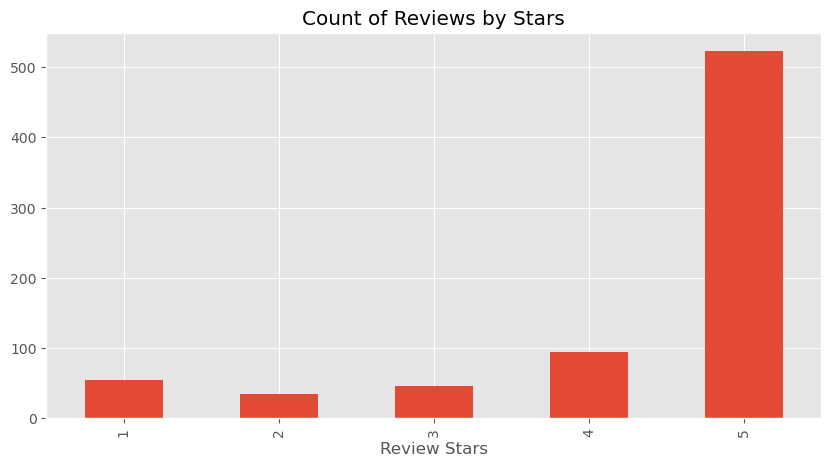

In [10]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK

In [11]:
example = df['Text'][50]
print(example)

I love this product, The best tasting protein drink I have tried.  It mixes up real nice, no clumps!


In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'love',
 'this',
 'product',
 ',',
 'The',
 'best',
 'tasting',
 'protein',
 'drink']

In [13]:
#pip install --upgrade nltk

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import nltk
nltk.data.path.append("C:\\Users\\smrc\\OneDrive\\Desktop\\NLP Modelling\\AmazonFineFoods3k.csv")

In [16]:
import nltk

# Download the POS tagger data
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('product', 'NN'),
 (',', ','),
 ('The', 'DT'),
 ('best', 'JJS'),
 ('tasting', 'NN'),
 ('protein', 'NN'),
 ('drink', 'VBP')]

In [18]:
# Download the chunking data and the maxent_ne_chunker resource
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [19]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  this/DT
  product/NN
  ,/,
  The/DT
  best/JJS
  tasting/NN
  protein/NN
  drink/VBP
  I/PRP
  have/VBP
  tried/VBN
  ./.
  It/PRP
  mixes/VBD
  up/RP
  real/JJ
  nice/NNS
  ,/,
  no/DT
  clumps/NN
  !/.)


## VADER Seniment Scoring

In [20]:
pip install nltk.sentiment

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.sentiment (from versions: none)
ERROR: No matching distribution found for nltk.sentiment


In [21]:
import nltk

# Download the VADER lexicon data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)

{'neg': 0.082, 'neu': 0.487, 'pos': 0.431, 'compound': 0.8832}

In [26]:
df.columns

Index(['Id', 'Product Id', 'User Id', 'Profile Name', 'Helpful Numerator',
       'Helpful Denominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [27]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/750 [00:00<?, ?it/s]

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [29]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Product Id,User Id,Profile Name,Helpful Numerator,Helpful Denominator,Score,Time,Summary,Text
0,565456,0.000,0.714,0.286,0.8313,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
1,565457,0.000,0.923,0.077,0.6369,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
2,565458,0.046,0.828,0.126,0.5994,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
3,565459,0.000,0.892,0.108,0.6696,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...
4,565460,0.055,0.724,0.221,0.7003,B002GKEK7G,A2AQL11U5EGHQE,violet412,0,0,5,1312329600,Addicted to this stuff. It is awesome.,This is my coffee and protein with great flavo...


## Plot VADER Results

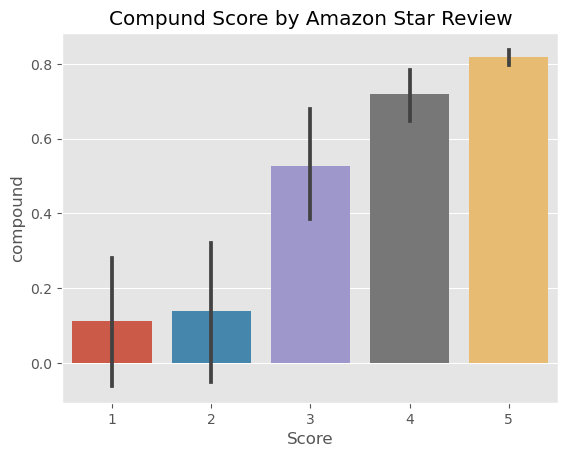

In [30]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

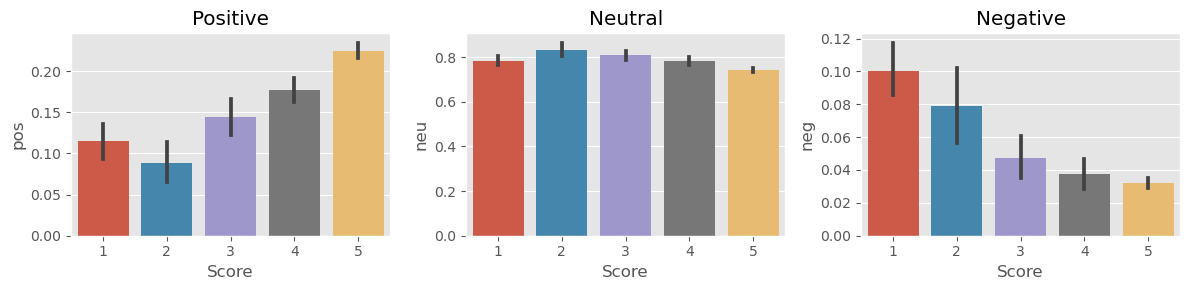

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## RoBERTa Pre-Trained Model

In [32]:
#pip install transformers

In [33]:
#pip install torch

In [34]:
#pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I love this product, The best tasting protein drink I have tried.  It mixes up real nice, no clumps!


{'neg': 0.082, 'neu': 0.487, 'pos': 0.431, 'compound': 0.8832}

In [38]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0015292682, 'roberta_neu': 0.007672488, 'roberta_pos': 0.99079823}


In [39]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/750 [00:00<?, ?it/s]

Broke for id 565852
Broke for id 565872
Broke for id 565892
Broke for id 565971
Broke for id 566164


In [41]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [42]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Product Id', 'User Id',
       'Profile Name', 'Helpful Numerator', 'Helpful Denominator', 'Score',
       'Time', 'Summary', 'Text'],
      dtype='object')

## Combine and Compare

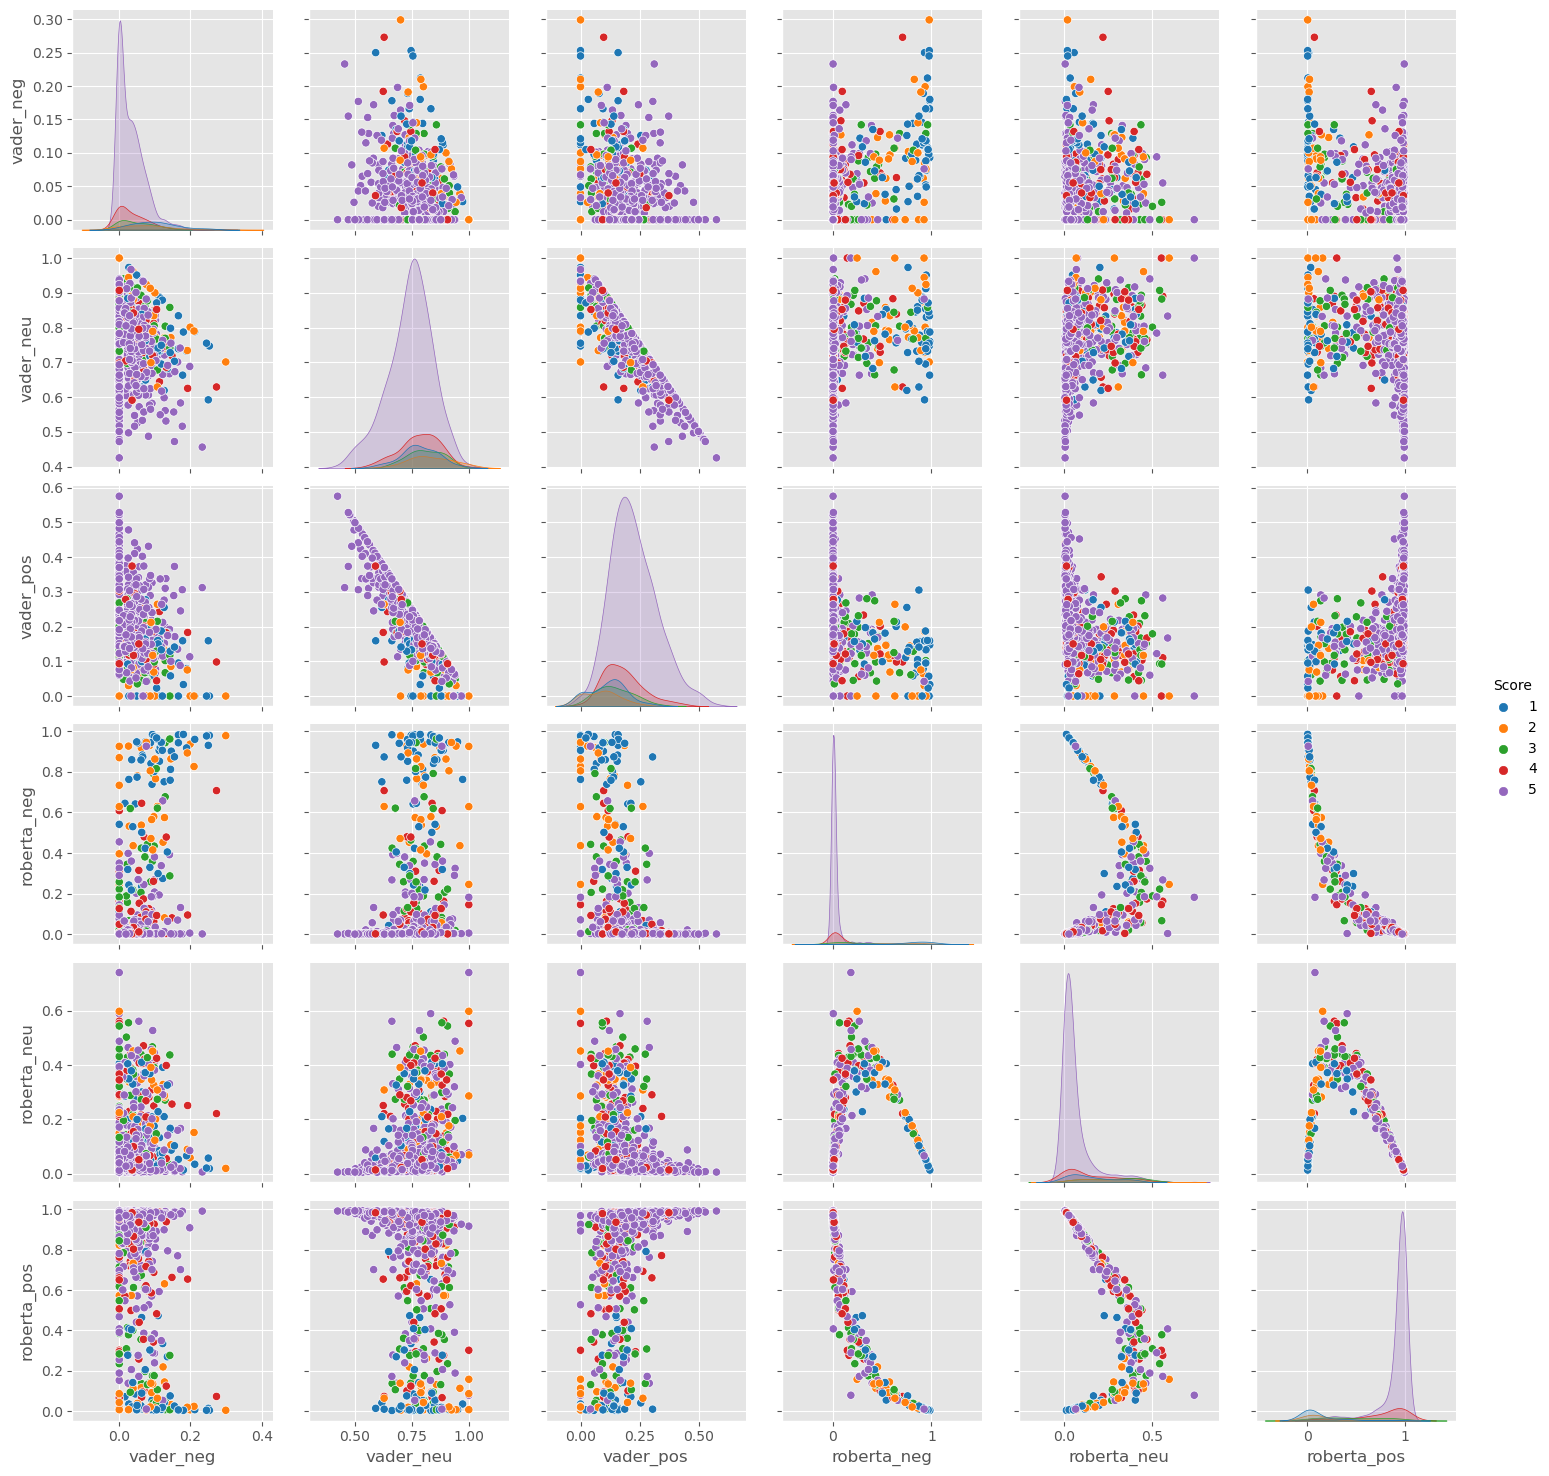

In [43]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Review Examples

In [44]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'this is a great product, but these bottles retail for about $2 each at your local whole foods/new seasons store!'

In [45]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Please consider whether you want to buy and consume something that was created in an inhumane way. There is no humane way to create a product like this.'

In [46]:
# negative sentiment 5-Star view
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'I don\'t understand why other reviewers are complaining about the sugar content in this product. GO TO THE WEBSITE AND SEE FOR YOURSELF. This product has 1 gram of sugar per serving! I don\'t understand how people think this stuff is "too sweet". All I know is it sticks to the roof of your mouth like no other peanut butter!'

In [47]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'i totally love this protein shake there is no weird taste no after taste NO shakes and it actually keeps me full and gives me great energy!!! i def recommend to everyone!!!!'

## The Transformers Pipeline

In [62]:
#!pip uninstall torch
#!pip install torch

In [64]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Print the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    # Print the name of the current GPU
    current_gpu = torch.cuda.get_device_name(0)
    print(f"Current GPU: {current_gpu}")
else:
    print("No GPUs available. Using CPU.")


No GPUs available. Using CPU.


Since we can't intsall a virtual environment, we will conclude here but the code below can evaluate statement and get sentiment.

In [69]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('I dont like sentiment analysis!')

In [ ]:
sent_pipeline('booo')